# Data Set
Download Dataset from kaggle

In [ ]:
!pip install opencv-python
import cv2 
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  73129      0 --:--:-- --:--:-- --:--:-- 71968


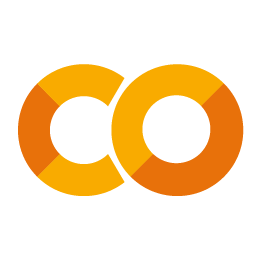

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  55975      0 --:--:-- --:--:-- --:--:-- 55975


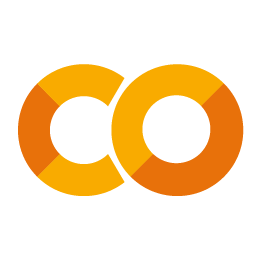

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


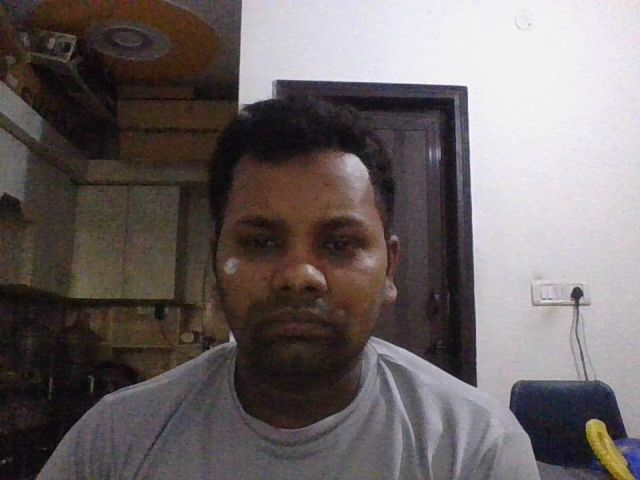

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install kaggle

<IPython.core.display.Javascript object>

Saved to photo.jpg


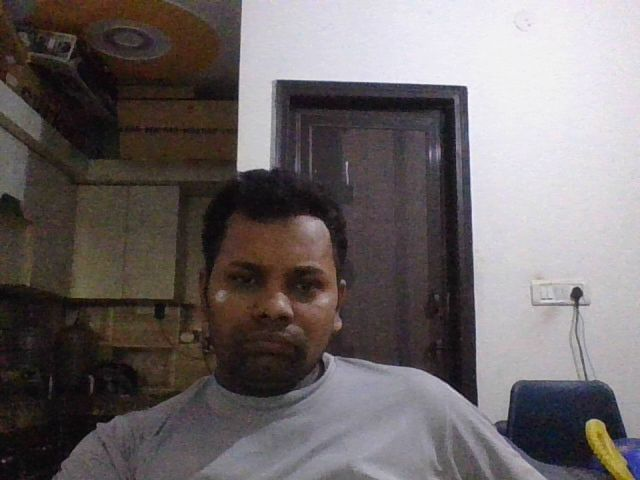

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"duxfeng","key":"3204a7487d8dd8da6dfe885330edbe6c"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d positivepc/object-detection


401 - Unauthorized


In [ ]:
!unzip /content/file.zip.zip

unzip:  cannot find or open /content/file.zip.zip, /content/file.zip.zip.zip or /content/file.zip.zip.ZIP.


In [ ]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.3MB 26kB/s 
     |████████████████████████████████| 3.2MB 56.4MB/s 
     |████████████████████████████████| 491kB 48.7MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install keras==2.3.1

In [ ]:
ls

# Train

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate,Embedding

In [ ]:
tf.__version__

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os


In [ ]:
#@title Default title text
conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


**include_top : Whether you would like to create your own fully connected network and then you want to train it or you want to utilize the fully connected network which is being used inside the imagenet.**

include_top = False , means we r going to create our own fully connected layer.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
/content/gdrive/MyDrive/Dataset/Train

SyntaxError: ignored

In [ ]:
  training_set = train_datagen.flow_from_directory("/content/gdrive/MyDrive/Dataset/Train",target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("/content/gdrive/MyDrive/Dataset/Test",target_size=(254, 254),batch_size=32,class_mode='categorical')

FileNotFoundError: ignored

In [ ]:
os.listdir() 

['.config', 'gdrive', 'sample_data']

In [ ]:
ls

gdrive/  sample_data/


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

NameError: ignored

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))              ## UpSampling increase the row and column of the data.Sometimes if we have less data so we can try to increase the data in this way.
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)                             ## conv_base is the inception network.We are keeping it here.
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(training_set, steps_per_epoch=1, epochs=1, batch_size=30, validation_data=test_set)

NameError: ignored

In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
model.summary()

NameError: ignored

In [ ]:

'''history = model.fit(train_data_gen,
                  
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)'''

In [ ]:
#model = tf.keras.models.load_model('my_model.h5')
model.save("cifar_model.h5")

In [ ]:
model1 = tf.keras.models.load_model("cifar_model.h5")

# New Section

# New Section

# New Section

In [ ]:
model1.predict_classes

<bound method Sequential.predict_classes of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f76b1fb4400>>

In [ ]:
model1.name

NameError: ignored

Input Dimensions - Image :  (500, 500, 3)


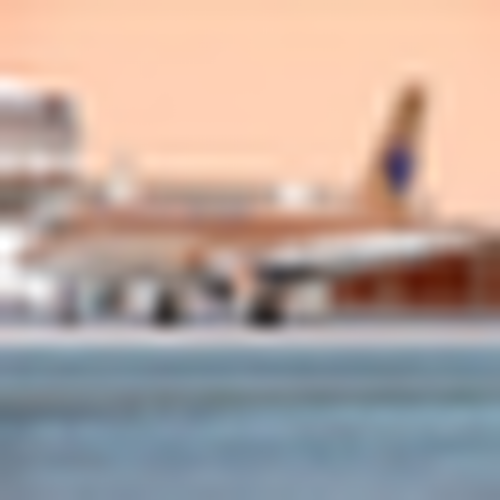

In [ ]:
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

input_img= "http://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png"

input_img = io.imread(input_img)
input_img = cv2.resize(input_img, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
print('Input Dimensions - Image : ',input_img.shape)
cv2_imshow(input_img)

In [ ]:
  import numpy as np
  from keras.preprocessing import image
  input_img = cv2.resize(input_img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(input_img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model1.predict(x)
  class_idx = np.argmax(preds[0])
  preds[0],class_idx

(array([9.7797412e-01, 3.9507509e-03, 6.1396473e-05, 2.0498812e-06,
        7.4606032e-05, 5.7969661e-13, 3.0668896e-05, 6.2606800e-09,
        8.3155646e-05, 1.7823229e-02], dtype=float32), 0)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
preds

In [ ]:
class_idx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
for layer in conv_base.layers:
  layer.trainable = False

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path='/content/drive/My Drive/iNeuron/pics'

In [ ]:
!unzip 'datasets_grey.zip'

In [ ]:
!ls

In [ ]:
# useful for getting number of classes
from glob import glob
#folders = glob('/content/drive/My Drive/iNeuron/pics/*')
folders = glob('/content/drive/MyDrive/Dataset/Train/*')
folders
#print(len(folders))

['/content/drive/MyDrive/Dataset/Train/Devansh',
 '/content/drive/MyDrive/Dataset/Train/Archana',
 '/content/drive/MyDrive/Dataset/Train/Jitendra']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset//Train',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 240 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset//Test',
                                            target_size = (75,75),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 60 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20


ValueError: ignored

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
#model.add(layers.k())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

model.fit(train_set, epochs=10, verbose=1,steps_per_epoch=50, validation_data=test_set)

ValueError: ignored

In [ ]:
import PIL
PIL.__version__

In [ ]:
from keras.utils import plot_model
# plot model architecture
plot_model(conv_base, show_shapes=True, to_file='multiple_vgg_blocks.png')

In [ ]:
from keras.utils import plot_model
# plot model architecture
plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')